<a href="https://colab.research.google.com/github/king-ayush/king-ayush/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic Dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_train=pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
df_test=pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Feature Selection**

For Numerical Values

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [ ]:
num_pipeline=Pipeline([
                       ("impute",SimpleImputer(strategy="median")),
                       ("scaler",StandardScaler())
])

For Categorical Values

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat_pipeline=Pipeline([
                       ("imputer",SimpleImputer(strategy="most_frequent")),
                       ("cat_encoder",OneHotEncoder(sparse=False))
])

Joining the numerical and categorical values

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
num_attribs=["Age","SibSp", "Parch", "Fare"]
cat_attribs=["Pclass", "Sex", "Embarked"]

In [ ]:
preprocess_pipeline=ColumnTransformer([
                                       ("num",num_pipeline,num_attribs),
                                       ("cat",cat_pipeline,cat_attribs)
])

**Model Prepeartion**

In [ ]:
X_train=preprocess_pipeline.fit_transform(df_train[num_attribs+cat_attribs])

In [ ]:
y_train=df_train["Survived"]

**SGD Classifier**

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf=SGDClassifier(random_state=42)

In [ ]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [ ]:
X_test=preprocess_pipeline.transform(df_test[num_attribs+cat_attribs])
y_test=df_test["Survived"]

In [ ]:
y_pred=sgd_clf.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

**Evaluating Model**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
sgd_scores=cross_val_score(sgd_clf,X_train,y_train,cv=5,scoring="accuracy")

In [ ]:
sgd_scores.mean()

0.7800263636934279

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
sgd_pred=cross_val_predict(sgd_clf,X_train,y_train,cv=5,method="decision_function")

In [ ]:
sgd_pred

array([-4.75743646e+00,  3.58434743e+00,  1.60372103e+00,  2.56015469e+00,
       -3.18649749e+00, -3.16454049e+00, -6.70941693e-01, -6.85216046e+00,
        3.47568872e+00,  2.40577142e+00,  1.06591687e+00,  3.85665489e+00,
       -3.14739210e+00,  3.00173337e-02,  1.63436240e+00,  2.90178103e+00,
       -8.37662289e+00, -1.82296303e+00,  8.46127224e-02,  2.45903937e+00,
       -1.72315771e+00, -1.83860519e+00,  1.63334457e+00, -7.51748764e-01,
       -2.09991219e+00,  4.80153641e+00, -2.30885106e+00, -1.60958821e+00,
        1.59809106e+00, -3.16964861e+00,  1.32122749e-02,  4.29365813e+00,
        1.59691778e+00, -1.94473282e+00, -1.05860208e+00, -2.23597414e+00,
       -2.30881292e+00, -3.14999912e+00, -1.47906135e+00,  9.34448434e-01,
       -1.62670246e-02,  1.42261793e+00, -2.30275945e+00,  4.38439759e+00,
        1.62155430e+00, -3.16824831e+00, -4.69815941e+00,  1.59691778e+00,
       -5.37272163e+00,  1.16687841e-01, -8.29373874e+00, -3.15226940e+00,
        3.60512499e+00,  

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cnf_mat=confusion_matrix(y_test,y_pred)
cnf_mat

array([[493,  56],
       [115, 227]])

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

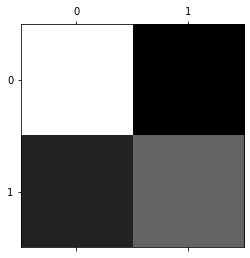

In [ ]:
plt.matshow(cnf_mat,cmap=plt.cm.gray)
plt.show()

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
ps=precision_score(y_test,y_pred)
ps

0.8021201413427562

In [ ]:
rs=recall_score(y_test,y_pred)
rs

0.6637426900584795

In [ ]:
fs=f1_score(y_test,y_pred)
fs

0.7263999999999999

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr,tpr,thresholds=roc_curve(y_train,sgd_pred)

In [ ]:
def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=4,label=label)
  plt.plot([0,1],[0,1],"k--")
  plt.grid(True,color='k')

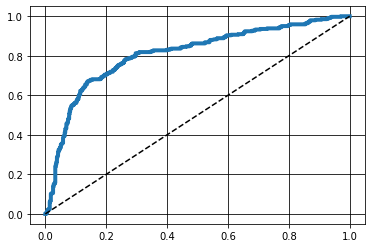

In [ ]:
plot_roc_curve(fpr,tpr)
plt.show()

**Random Forest Classifer**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_clf=RandomForestClassifier(n_estimators=100,random_state=42)

In [ ]:
forest_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_predict=forest_clf.predict(X_test)
y_predict

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
forest_score=cross_val_score(forest_clf,X_train,y_train,cv=5,scoring="accuracy")
forest_score.mean()

0.8069989328981231

In [ ]:
pre_score=precision_score(y_train,y_predict)
pre_score

0.990909090909091

In [ ]:
recall_score(y_train,y_predict)

0.956140350877193

In [ ]:
f1_score(y_train,y_predict)

0.9732142857142858